In [145]:
import lib.My_library as my
from matplotlib import pyplot as plt
import math as m
import random



In [146]:
 with open("./esem_table.txt", 'r') as f: # reading the file and store in M as list    
        M = [map(float,item.split()) for item in f.read().split('\n')]
        

data = list(map(list,M))
xvals, yvals = tuple(map(list, zip(*data)))

In [147]:
def rms(data):
    sum = 0
    for point in data:
        sum = sum + (point[0]-point[1])*(point[0]-point[1]) 
        
    return m.sqrt(sum/len(data))
    

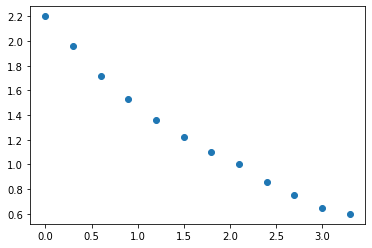

In [148]:
plt.scatter(*zip(*data))

In [149]:
def function1ToFit(a,b):
    def fun(t):
        return a+b*t
    return fun

def function2ToFit(a,b):
    def fun(t):
        return b*((2.71828)**((-1)*(a*t)))
    return fun

# w_0 +w_1 x fiting 

In [157]:
paramiterGuss = [1,1]
rmsValue = 0
lamdaUpadate = 0.99
lamda = 1
for i in range(1000):
    lamda = lamda*lamdaUpadate
    paramiterGussList = []
    for i in range(10):
        dx = lamda*m.sin(random.uniform(0,1) * m.pi * 2)
        dy = lamda*m.cos(random.uniform(0,1) * m.pi * 2)
        paramiterGuss = (paramiterGuss[0]+ dx,paramiterGuss[1]+ dy)
        paramiterGussList.append(paramiterGuss)
        
    rmsList= []
    for paramiterGuss in paramiterGussList :
        dataP=[]
        for i in data:
            fun = function1ToFit(*paramiterGuss)
            yCal= fun(i[0])
            dataP.append([i[1],yCal])

        #print(dataP)
        rmsList.append(rms(dataP))
    #print(sorted(list(zip(rmsList,paramiterGussList)), key=lambda data: data[0]))
    
    paramiterGuss = sorted(list(zip(rmsList,paramiterGussList)), key=lambda data: data[0])[0][1]
    rmsValue = sorted(list(zip(rmsList,paramiterGussList)), key=lambda data: data[0])[0][0]
    #print("New RMS value "+str(round(sorted(list(zip(rmsList,paramiterGussList)), key=lambda data: data[0])[0][0],4))+" with paramiter w_0 ="+str(round(paramiterGuss[0],4))+" w_2= "+str(round(paramiterGuss[1],4))) 
    

print("New RMS value "+str(round(rmsValue,4))+" with paramiter w_0 ="+str(round(paramiterGuss[0],4))+" w_1= "+str(round(paramiterGuss[1],4))) 


New RMS value 0.0857 with paramiter w_0 =2.0291 w_1= -0.4747


# W_1 * e^(-W_0x)

In [153]:
paramiterGuss = [1,1]
rmsValue = 0
lamdaUpadate = 0.99
lamda = 1
for i in range(1000):
    lamda = lamda*lamdaUpadate
    paramiterGussList = []
    for i in range(10):
        dx = lamda*m.sin(random.uniform(0,1) * m.pi * 2)
        dy = lamda*m.cos(random.uniform(0,1) * m.pi * 2)
        paramiterGuss = (paramiterGuss[0]+ dx,paramiterGuss[1]+ dy)
        paramiterGussList.append(paramiterGuss)
        
    rmsList= []
    for paramiterGuss in paramiterGussList :
        dataP=[]
        for i in data:
            fun = function2ToFit(*paramiterGuss)
            yCal= fun(i[0])
            dataP.append([i[1],yCal])

        #print(dataP)
        rmsList.append(rms(dataP))
    #print(sorted(list(zip(rmsList,paramiterGussList)), key=lambda data: data[0]))
    
    paramiterGuss = sorted(list(zip(rmsList,paramiterGussList)), key=lambda data: data[0])[0][1]
    rmsValue = sorted(list(zip(rmsList,paramiterGussList)), key=lambda data: data[0])[0][0]
    #print("New RMS value "+str(round(sorted(list(zip(rmsList,paramiterGussList)), key=lambda data: data[0])[0][0],4))+" with paramiter w_0 ="+str(round(paramiterGuss[0],4))+" w_2= "+str(round(paramiterGuss[1],4))) 

print("New RMS value "+str(round(rmsValue,4))+" with paramiter w_0 ="+str(round(paramiterGuss[0],4))+" w_1= "+str(round(paramiterGuss[1],4))) 




New RMS value 0.016 with paramiter w_0 =2.1959 w_2= 0.3927
